Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Replacing "Gender - Male and Female" with numeric values - 0 and 1 respectively and renaming columns



In [ ]:
df['Gender'] = df['Gender'].replace(['Male'],0)
df['Gender'] = df['Gender'].replace(['Female'],1)
df = df.rename(columns={"Annual Income (k$)":"Income"})
df = df.rename(columns={"Spending Score (1-100)":"Score"})
df.head()


,CustomerID,Gender,Age,Income,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40



Visualise initial data points

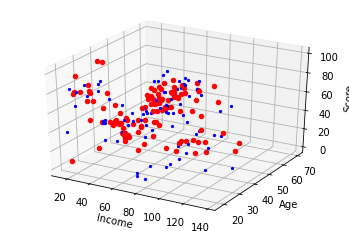

<Figure size 432x288 with 0 Axes>

In [ ]:
X = df[["Gender","Age","Income","Score"]]
fig = plt.figure()
xlist = X.values.tolist()
ax = fig.add_subplot(111, projection='3d')
""" four dimension - 
x = "Income"
y = "Age"
z = "Score"
w = "Gender"""
for i in range (len(xlist)):
  if xlist[i][0] == 0:
    b=5
    img = ax.scatter(xlist[i][2],xlist[i][1],xlist[i][3],'MarkerSize',b,c="blue")
  elif xlist[i][0] ==1:
    b=20
    img = ax.scatter(xlist[i][2],xlist[i][1],xlist[i][3],'MarkerSize',b,c="red")
plt.xlabel('Income')
plt.ylabel('Age')
ax.set_zlabel('Score')
plt.show()
plt.savefig('initial.png')


In [ ]:
k = int(input("Enter the value of k : "))

Enter the value of k : 5


Visualizing Initial Centroids

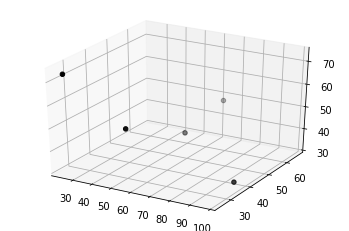

In [ ]:
Centroids = (X.sample(n=k))
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(Centroids["Income"],Centroids["Age"],Centroids["Score"],c='black')
plt.show()

In [ ]:
print(Centroids)

     Gender  Age  Income  Score
75        0   26      54     54
98        0   48      61     42
109       0   66      63     48
21        0   25      24     73
180       1   37      97     32


First categorization

In [ ]:

xlist = X.values.tolist()
Centroid = Centroids.values.tolist()
arr=[]
for i in range(k):
  arr.append([])
for i in range(len(xlist)):
  sum = 0 
  r = 0
  for j in range(k):
    a = sum
    x = (xlist[i][2]-Centroid[j][2])**2
    y = (xlist[i][1]-Centroid[j][1])**2
    z = (xlist[i][3]-Centroid[j][3])**2
    c = (xlist[i][0]-Centroid[j][0])**2
    sum = np.sqrt(x+y+z+c)
    #print(j, sum)
    if a != 0:
      if a < sum:
        sum = a
        #print("l", r, "a" ,sum )
      else:
        sum = sum
        r = j
        #print("m", r, "a" ,sum )
    else:
      #print("n", r, "a" ,sum )
      continue
  #print(r, xlist[i]) 
  arr[r].append(xlist[i])
  #print(arr[r])
  
  continue
print(arr)
for e in range(k):
  print(len(arr[e]))


[[[1, 20, 16, 6], [1, 35, 21, 35], [0, 35, 24, 35], [1, 31, 39, 61], [1, 27, 40, 47], [1, 29, 40, 42], [1, 31, 40, 42], [0, 33, 42, 60], [1, 31, 43, 54], [1, 27, 46, 51], [0, 19, 46, 55], [0, 18, 48, 59], [0, 19, 48, 59], [1, 32, 48, 47], [0, 26, 54, 54], [1, 23, 54, 52], [0, 38, 54, 55], [1, 21, 54, 57], [1, 22, 57, 55], [1, 34, 58, 60], [0, 18, 59, 41], [1, 32, 60, 42], [0, 24, 60, 52], [1, 27, 60, 50], [0, 20, 61, 49], [1, 23, 62, 41], [0, 26, 62, 55], [1, 21, 62, 42], [1, 19, 63, 54], [0, 19, 64, 46], [1, 18, 65, 48], [1, 19, 65, 50], [0, 27, 67, 56], [0, 39, 69, 91], [1, 31, 70, 77], [0, 40, 71, 95], [0, 38, 71, 75], [0, 39, 71, 75], [1, 31, 72, 71], [1, 29, 73, 88], [0, 32, 73, 73], [1, 35, 74, 72], [0, 32, 75, 93], [1, 32, 76, 87], [0, 28, 77, 97], [1, 32, 77, 74], [0, 34, 78, 90], [0, 39, 78, 88], [1, 38, 78, 76], [1, 27, 78, 89], [1, 30, 78, 78], [1, 30, 78, 73], [1, 29, 79, 83], [1, 31, 81, 93], [1, 36, 85, 75], [1, 33, 86, 95], [0, 28, 87, 75], [0, 36, 87, 92], [1, 30, 88, 8

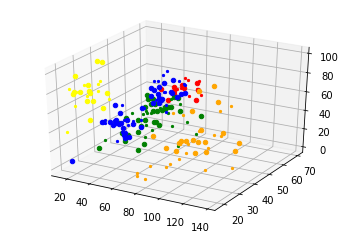

64
51
21
24
40


<Figure size 432x288 with 0 Axes>

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
colours = ["blue","green","red","yellow","orange","grey","pink","purple","navyblue","cyan","black"]
for j in range(k):
  for i in range(len(arr[j])):
    if arr[j][i][0]==0:
      b = 5
      ax2.scatter(arr[j][i][2],arr[j][i][1],arr[j][i][3],'MarkerSize',b,c=colours[j])
    else: 
      b = 20
      ax2.scatter(arr[j][i][2],arr[j][i][1],arr[j][i][3],'MarkerSize',b,c=colours[j])
plt.show()
plt.savefig('firstCluster.png')
for e in range(k):
  print(len(arr[e]))

Calcute Centroids

In [ ]:
def centroid(arr,k):
  cent = []
  for a in range(k):
    x_coords = [p[2] for p in arr[a]]
    y_coords = [p[1] for p in arr[a]]
    z_coords = [p[3] for p in arr[a]]
    c_coords = [p[0] for p in arr[a]]
    #print(x_coords)
    x_coords = list(x_coords)
    #print(sum(x_coords))
    g = 0
    f = 0
    h = 0
    m = 0
    for i in x_coords:
      g += i
    for j in y_coords:
      f += j
    for k in z_coords:
      h += k
    for l in c_coords:
      m += l

    

    centroid_x = g/(len(arr[a]))
    centroid_y = f/len(arr[a])
    centroid_z = h/len(arr[a])
    centroid_c = m/len(arr[a])
    cent.append([centroid_x, centroid_y,centroid_z,centroid_c])
  return cent

In [ ]:
newcent = centroid(arr,k)
#print(newcent)

In [ ]:
d = 1
v = 0
print(xlist)
while d!=0 :
  arr1=[] 
  for i in range(k):
    arr1.append([])
  for i in range(len(xlist)):
    sum = 0 
    r = 0
    for j in range(k):
      a = sum
      x = (xlist[i][2]-newcent[j][0])**2
      y = (xlist[i][1]-newcent[j][1])**2
      z = (xlist[i][3]-newcent[j][2])**2
      c = (xlist[i][0]-newcent[j][3])**2
      sum = np.sqrt(x+y+z+c)
      #print(j, sum)
      if a != 0:
        if a < sum:
          sum = a
          #print("l", r, "a" ,sum )
        else:
          sum = sum
          r = j
          #print("m", r, "a" ,sum )
      else:
        #print("n", r, "a" ,sum )
        continue
    #print(r, xlist[i]) 
    arr1[r].append(xlist[i])
  #print(v)
  #print(arr1)
  #print(arr)
  if arr == arr1:
    d = 0
  else:
    arr = arr1
    newcent = centroid(arr,k)
    #print("newcent",newcent)
  v = v+1
  



    









[[0, 19, 15, 39], [0, 21, 15, 81], [1, 20, 16, 6], [1, 23, 16, 77], [1, 31, 17, 40], [1, 22, 17, 76], [1, 35, 18, 6], [1, 23, 18, 94], [0, 64, 19, 3], [1, 30, 19, 72], [0, 67, 19, 14], [1, 35, 19, 99], [1, 58, 20, 15], [1, 24, 20, 77], [0, 37, 20, 13], [0, 22, 20, 79], [1, 35, 21, 35], [0, 20, 21, 66], [0, 52, 23, 29], [1, 35, 23, 98], [0, 35, 24, 35], [0, 25, 24, 73], [1, 46, 25, 5], [0, 31, 25, 73], [1, 54, 28, 14], [0, 29, 28, 82], [1, 45, 28, 32], [0, 35, 28, 61], [1, 40, 29, 31], [1, 23, 29, 87], [0, 60, 30, 4], [1, 21, 30, 73], [0, 53, 33, 4], [0, 18, 33, 92], [1, 49, 33, 14], [1, 21, 33, 81], [1, 42, 34, 17], [1, 30, 34, 73], [1, 36, 37, 26], [1, 20, 37, 75], [1, 65, 38, 35], [0, 24, 38, 92], [0, 48, 39, 36], [1, 31, 39, 61], [1, 49, 39, 28], [1, 24, 39, 65], [1, 50, 40, 55], [1, 27, 40, 47], [1, 29, 40, 42], [1, 31, 40, 42], [1, 49, 42, 52], [0, 33, 42, 60], [1, 31, 43, 54], [0, 59, 43, 60], [1, 50, 43, 45], [0, 47, 43, 41], [1, 51, 44, 50], [0, 69, 44, 46], [1, 27, 46, 51], [0

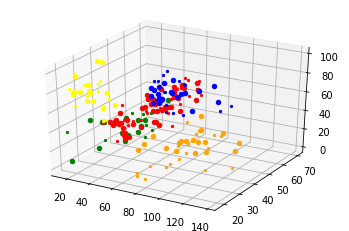

<Figure size 432x288 with 0 Axes>

In [ ]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
for j in range(k):
  for i in range(len(arr[j])):
    if arr[j][i][0]==0:
      b = 5
      ax3.scatter(arr[j][i][2],arr[j][i][1],arr[j][i][3],'MarkerSize',b,c=colours[j])
    else: 
      b = 20
      ax3.scatter(arr[j][i][2],arr[j][i][1],arr[j][i][3],'MarkerSize',b,c=colours[j])
plt.show()
plt.savefig('finalCluster.png')

In [ ]:
def WCSS(arr,k):
  finalarr= arr
  print(finalarr)
  pro = centroid(finalarr,k)
  print(pro)
  finalWCSS = 0
  for i in range(k):
    WCSSsum = 0
    for j in range(len(finalarr[i])):
      x = (finalarr[i][j][2]-pro[i][0])**2
      y = (finalarr[i][j][1]-pro[i][1])**2
      z = (finalarr[i][j][3]-pro[i][2])**2
      c = (finalarr[i][j][0]-pro[i][3])**2
      WCSSsum = WCSSsum + np.sqrt(x+y+z+c)
  
    WCSSsum = WCSSsum/len(finalarr[i])
    finalWCSS+=WCSSsum
  finalWCSS/= k
  print(finalWCSS)

WCSS(arr,k)


[[[0, 21, 15, 81], [1, 23, 16, 77], [1, 22, 17, 76], [1, 23, 18, 94], [1, 30, 19, 72], [1, 35, 19, 99], [1, 24, 20, 77], [0, 22, 20, 79], [0, 20, 21, 66], [1, 35, 23, 98], [0, 25, 24, 73], [0, 31, 25, 73], [0, 29, 28, 82], [0, 35, 28, 61], [1, 23, 29, 87], [1, 21, 30, 73], [0, 18, 33, 92], [1, 21, 33, 81], [1, 30, 34, 73], [1, 20, 37, 75], [0, 24, 38, 92], [1, 24, 39, 65]], [[0, 39, 69, 91], [1, 31, 70, 77], [0, 40, 71, 95], [0, 38, 71, 75], [0, 39, 71, 75], [1, 31, 72, 71], [1, 29, 73, 88], [0, 32, 73, 73], [1, 35, 74, 72], [0, 32, 75, 93], [1, 32, 76, 87], [0, 28, 77, 97], [1, 32, 77, 74], [0, 34, 78, 90], [0, 39, 78, 88], [1, 38, 78, 76], [1, 27, 78, 89], [1, 30, 78, 78], [1, 30, 78, 73], [1, 29, 79, 83], [1, 31, 81, 93], [1, 36, 85, 75], [1, 33, 86, 95], [0, 32, 87, 63], [0, 28, 87, 75], [0, 36, 87, 92], [1, 30, 88, 86], [0, 27, 88, 69]], [[1, 23, 70, 29], [0, 59, 71, 11], [0, 47, 71, 9], [1, 25, 72, 34], [0, 20, 73, 5], [1, 44, 73, 7], [0, 19, 74, 10], [1, 57, 75, 5], [0, 25, 77, 